# Forcing Patterns and Reversibility

This Notebook will investigate the temperature responses of the upper and lower in the 2-layer model layer to different forcing patterns.

The following forcing patterns will be investigated:

    a. constant positive forcing
    b. constant negative forcing
    c. step increase
    d. step decrease
    e. top hat
    f. linearly increasing forcing
    g. linearly decreasing forcing
    h. triangular forcing
    i. exponentially increasing
    j. sinusoidal forcing

In order to investigate reversibility (the precise meaning of which still must be investigated), we will then perform reflections in the x-axis(if not already obvious), and in time. 

In [17]:
from ar6.twolayermodel import TwoLayerModel
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
runs = {}

First we create the objects corresponding to the different forcing scenarios. I will store the different forcing scenarios in a dictionary, called "runs".

### a) Constant Positive Forcing

We will look at 5 different magnitudes of constant forcing:

1.  0 : No forcing (is this not essentially -1 CO2? )
1.  1 : 1xCO2
1.  2 : 2xCO2
1.  4 : 4xCO2
1.  8 : 8xCO2


In [19]:
#We start with the constant forcing (a)

force_mags = [0,1,2,4,8]

for mag in force_mags:
    print(f"currently on const. mag: %s... "%mag)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= mag*np.ones(270),
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )

        out = scm.run()
    
    runs[f"const_%s" %mag] = out

currently on const. mag: 0... 


100%|██████████| 1000/1000 [00:14<00:00, 71.35it/s]


currently on const. mag: 1... 


100%|██████████| 1000/1000 [00:15<00:00, 62.87it/s]


currently on const. mag: 2... 


100%|██████████| 1000/1000 [00:15<00:00, 62.74it/s]


currently on const. mag: 4... 


100%|██████████| 1000/1000 [00:15<00:00, 62.82it/s]


currently on const. mag: 8... 


100%|██████████| 1000/1000 [00:16<00:00, 61.25it/s]


### b) Constant Negative Forcing

We will look at 4 different magnitudes of constant forcing:

1.  -1 : -1xCO2
1.  -2 : -2xCO2
1.  -4 : -4xCO2
1.  -8 : -8xCO2


### b) Constant Negative Forcing

We will look at 4 different magnitudes of constant forcing:

1.  -1 : -1xCO2
1.  -2 : -2xCO2
1.  -4 : -4xCO2
1.  -8 : -8xCO2


In [20]:
#We start with the constant forcing (a)

force_mags = [-1,-2,-4,-8]

for mag in force_mags:
    print(f"currently on const. mag: %s... "%mag)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= mag *np.ones(270),
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )

        out = scm.run()
    
    runs[f"const_%s" %mag] = out

currently on const. mag: -1... 


100%|██████████| 1000/1000 [00:15<00:00, 62.94it/s]


currently on const. mag: -2... 


100%|██████████| 1000/1000 [00:15<00:00, 63.58it/s]


currently on const. mag: -4... 


100%|██████████| 1000/1000 [00:15<00:00, 63.02it/s]


currently on const. mag: -8... 


100%|██████████| 1000/1000 [00:18<00:00, 55.50it/s]


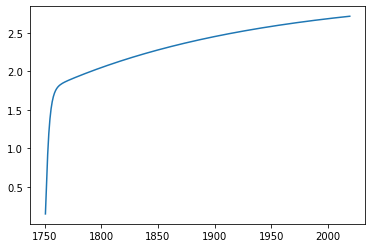

In [21]:
sus_run = runs["const_4"]

plt.plot(sus_run.time, sus_run.tg)

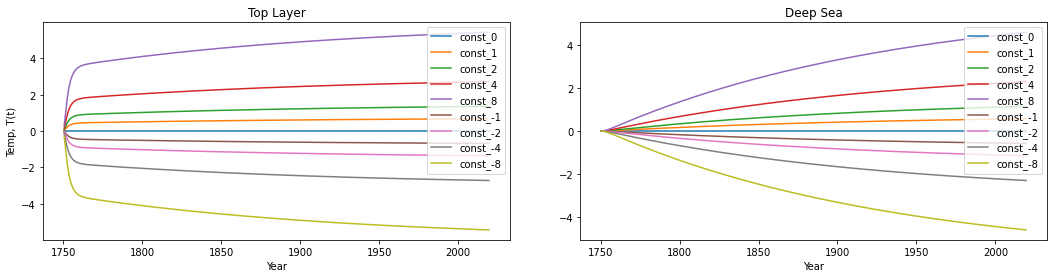

In [22]:
# Plotting the constant forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = list(runs.keys())
run_outputs = list(runs.values())
layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Results above look as expected. Not mega interesting. 
What is more interesting is potentially the difference between the top layer and the deep sea...

Top layer reaches an (almost) equilibrium within the time range, the Deep sea layer does not.

==> Maybe looking at a longer time range will be interesting (but not so useful?)

### c) Step Increase & d) Step Decrease

We will implement a step increase/decrease to/from 4xCO2 halfway through the time range.

Notice how in the pots above 4xCO2 seems like a decent value to look at... In reality we picked this purely because it was the default in the original notebook, but Geoffroy should be read in more detail to figure out why 4xCO2 was picked instead of the standard 2xCO2...

==> Read Geoffroy to answer.

In [192]:
#Step forcing. 

stepIncrease = 4*np.ones(270)
stepIncrease[:int(270/2)] = 0

stepDecrease = 4*np.ones(270)
stepDecrease[int(270/2):] = 1

steps = [stepIncrease, stepDecrease]
step_names = ["Step Increase", "Step Decrease"]

for (step, name) in zip(steps, step_names):
    print(f"currently on %s... "%name)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= step,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        
        out = scm.run()
    runs[name] = out

currently on Step Increase... 


100%|██████████| 1000/1000 [00:21<00:00, 46.00it/s]


currently on Step Decrease... 


100%|██████████| 1000/1000 [00:18<00:00, 52.64it/s]


In [ ]:
runs[""]

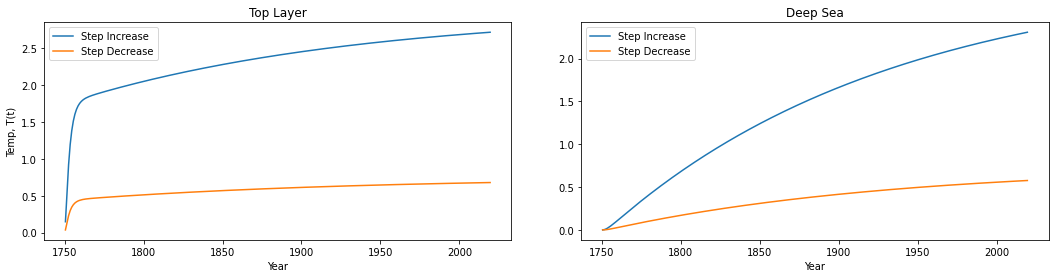

In [193]:
# Plotting the step forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = step_names
run_outputs = [runs.get(key) for key in step_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

### 5/2/22

What is happening with out step decrease? I checked it again and got the same results... See below for (now fixed) issue.

==> Maybe the decrease sets in too soon and we can't see the effects at all? This is strange, I wouldn't have expected the inertia (?) to be that great. 
 No, this is not the case. we get the constant T(t) = 0 when we decrease to 0.. If we go to 1, we do not get this issue.
==> We need to look at what this forcing actually is in depth. What does a 0 forcing mean?

The step decrease does not result in a drop in temperature. Maybe if we suddenly reversed it it would.. that will be top hat.

The thermal inertia of the deep sea means that step changes aren't very visible/ different to constant forcings..

### 7/2/22

The step decrease is definitely wrong. I repeated the same thing in the Final_value_dependence notebook and we should most definitely see a change in temp when the forcing suddenly decreases to 1.

In [55]:

stepDecrease = 4*np.ones(270)
stepDecrease[int(270/1.3):] = 0


for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= stepDecrease,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        outde = scm.run()


100%|██████████| 1000/1000 [00:13<00:00, 71.63it/s]


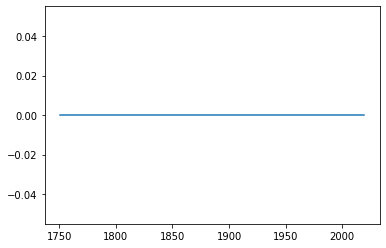

In [56]:
plt.plot(outde.time, outde.tg)


### e) Top hat

A combination of c) and d). 

From lessons learned with step decrease, we will go 1-4-1, instead of 0-4-0...

100%|██████████| 1000/1000 [00:18<00:00, 54.13it/s]


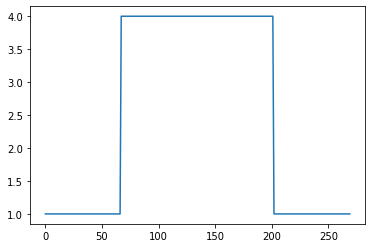

In [189]:
#Step forcing. 

topHat = np.ones(270)
topHat[int(270/4):int(3*270/4)] = 4

plt.plot(topHat)

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
    scm = TwoLayerModel(
        extforce= topHat,
        exttime=np.arange(270),
        tbeg=1750,
        tend=2020,
        lamg=4.0/3.0,
        t2x=None,
        eff=1.29,
        cmix=6,
        cdeep=75,
        gamma_2l=0.7,
        outtime=np.arange(1750.5,2020),
        dt=1
        )
        
    out = scm.run()

    runs["TopHat"] = out


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


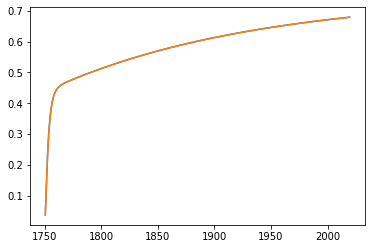

In [190]:
outth = runs["TopHat"]
plt.plot(outth.time, outth.tg)

outsd = runs["Step Decrease"]
plt.plot(outsd.time, outsd.tg)

print(outth.tg - outsd.tg)

['Linear Increase', 'Linear Decrease', 'Triangular', 'TopHat']


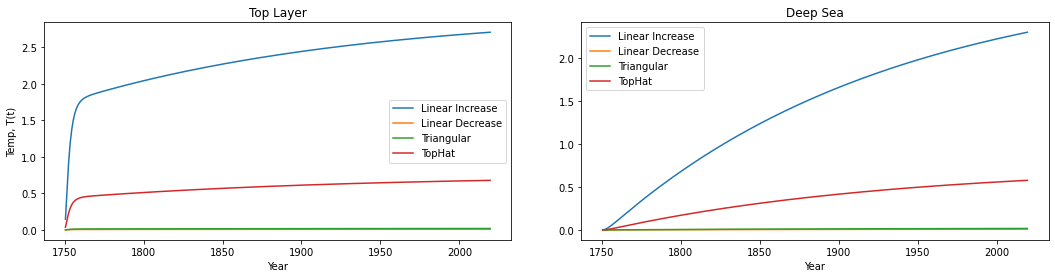

In [191]:
# Plotting the step forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = step_names+["TopHat"]
print(scenario_names)
run_outputs = [runs.get(key) for key in scenario_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Step decrease and top hat are identical. Why?
-The initial low forcing stage is too short? What if this is a longer period? Let's look below.

100%|██████████| 1000/1000 [00:18<00:00, 54.83it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


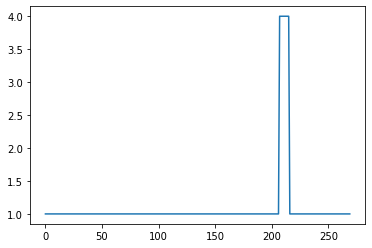

In [187]:
#Step forcing. 

topHat = np.ones(270)
topHat[int(270/1.3):int(3.2*270/4)] = 4

plt.plot(topHat)

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
    scm = TwoLayerModel(
        extforce= topHat,
        exttime=np.arange(270),
        tbeg=1750,
        tend=2020,
        lamg=4.0/3.0,
        t2x=None,
        eff=1.29,
        cmix=6,
        cdeep=75,
        gamma_2l=0.7,
        outtime=np.arange(1750.5,2020),
        dt=1
        )
        
    outth2 = scm.run()




outsd = runs["Step Decrease"]

print(outth2.tg - outsd.tg)


No, the start time/length of the top hat is not the problem. I'm now a bit suspicious of our step decrease result. Let me run again.

Is the step decrease result identical to the 1xCO2 constant forcing?

In [74]:
outsd = runs["Step Decrease"]
out1CO2 = runs["const_1"]

print(out1CO2.tg - outsd.tg)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


YES. hmmmmmmmmmmmm. Interesting.

Maybe, instead we need to step decrease from a higher value than 4xCO2. 

It's either that or the high bit of the step isn't long enough.

100%|██████████| 1000/1000 [00:18<00:00, 53.80it/s]


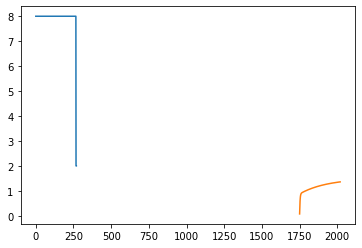

In [84]:
stepDecrease = 8*np.ones(270)
stepDecrease[int(270/1.01):] = 2
plt.plot(stepDecrease)

for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= stepDecrease,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        outde_Higher = scm.run()


plt.plot(outde_Higher.time, outde_Higher.tg)

In [85]:
out2CO2 = runs["const_2"]
print(outde_Higher.tg - out2CO2.tg )


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


Nope! Same problem! Why?

News! This does not happen if we do 0-10-2... Maybe the final value is all that sticks...
Yes. This does seem to be the case. But what if we increase step length significantly? The overlap is suspiciously perfect.

Even if the decrease is only at the very last point in the time range, we still get the exact same values as for the 2x increase! 

### Something is very off!

### f) Linear increase, g) Linear Decrease, h)Triangular

Linear increase/decrease to 4xCO2. From 0 CO2... will be interesting to see if this has the same problem as step where last value determines entire behaviour...

currently on Linear Increase... 


100%|██████████| 1000/1000 [00:19<00:00, 51.10it/s]


currently on Linear Decrease... 


100%|██████████| 1000/1000 [00:17<00:00, 57.64it/s]


currently on Triangular... 


100%|██████████| 1000/1000 [00:17<00:00, 55.75it/s]


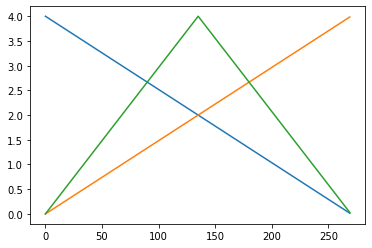

In [110]:
#Linear forcing. 

m = 4/270
xs = np.arange(270)

linearIncrease = m * xs
linearDecrease = -m * xs + 4
triangular = np.append(2*m * xs[:int(270/2)], -2*m * xs[:int(270/2)] + 4)

# Failed Debugging attempt
#linearDecrease[linearDecrease == 0] = 1
#triangular[triangular == 0] = 1

plt.plot(linearDecrease)
plt.plot(linearIncrease)
plt.plot(triangular)

steps = [linearIncrease, linearDecrease, triangular]
step_names_linear = ["Linear Increase", "Linear Decrease", "Triangular"]

for (step, name) in zip(steps, step_names_linear):
    print(f"currently on %s... "%name)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= step,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        
        out = scm.run()
    runs[name] = out
    

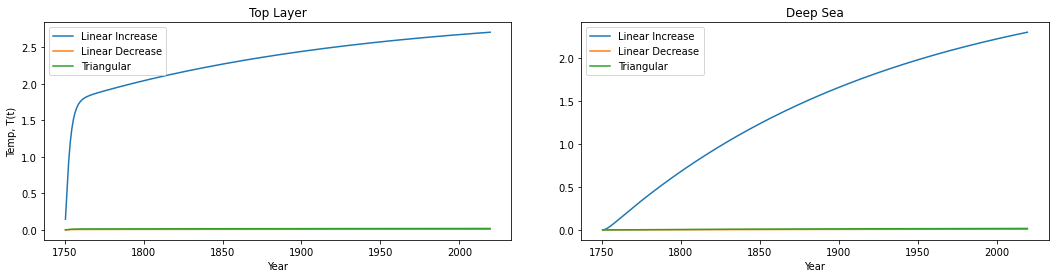

In [103]:
# Plotting the linear forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = ["Linear Increase", "Linear Decrease", "Triangular"]

run_outputs = [runs.get(key) for key in scenario_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Yes. I think we are getting the same issue. I think this is a mathematical/coding error...... Need to understand the code better

==> Fix once issue is resolved. 

It will be interesting to see what happens with sinx, as it does pass through 0...

### i) Exponential

Exponential increase:

$f(t) = e^{at}$

$a = \frac{ln(4)}{270} $

Exponential decrease:

$g(t) = e^{bt + c}$

$c = ln(4)$

$b = -\frac{c}{270} $



currently on Exp. Increase... 


100%|██████████| 1000/1000 [00:21<00:00, 46.35it/s]


currently on Exp. Decrease... 


100%|██████████| 1000/1000 [00:17<00:00, 56.31it/s]


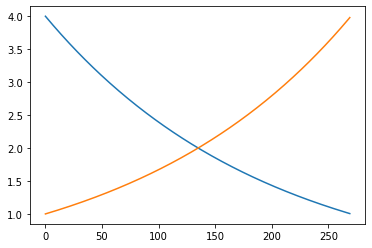

In [108]:
#Exponential forcing. 

a = np.log(4) / 270
xs = np.arange(270)

c = np.log(4)
b = -c / 270

expIncrease = np.exp(a * xs)
expDecrease = np.exp(b * xs + c)

plt.plot(expDecrease)
plt.plot(expIncrease)

steps = [expIncrease, expDecrease]
step_names_exp = ["Exp. Increase", "Exp. Decrease"]

for (step, name) in zip(steps, step_names_exp):
    print(f"currently on %s... "%name)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= step,
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        
        out = scm.run()
    runs[name] = out
    

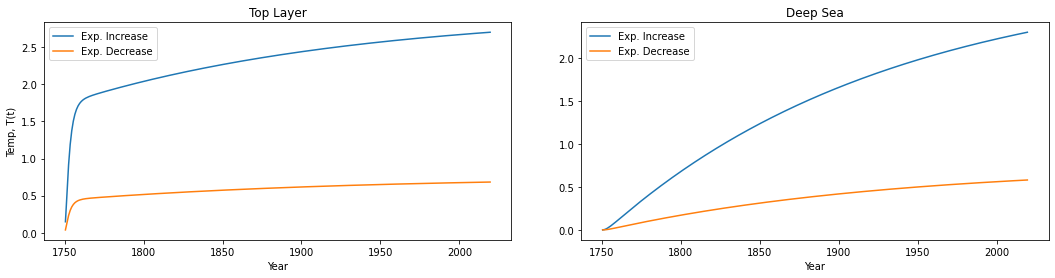

In [109]:
# Plotting the exp. forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = ["Exp. Increase", "Exp. Decrease"]

run_outputs = [runs.get(key) for key in scenario_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Interesting... But exp.decrease only decreases to 1xCO2. Let's see if it matches the const_1CO2 forcing scenario..

In [118]:
if np.all((runs["const_1"].tg - runs["Exp. Decrease"].tg) == np.zeros(270)):
    print("They're the same :( ")
else: 
    print("Different ! :) ")

Different ! :) 


### j) Sinuoidal Forcing

We want to try different frequencies. Maybe there will be a resonance.. 

We will stick to an amplitude of 4xCO2. 



In [177]:
#Sinuoidal forcing. 

xs = np.arange(270)

freqs = [0.1, 1, 5, 10, 50]

names  = []

for i, e in enumerate(freqs):
    a = "Sin freq = " + str(e)
    names.append(a)

step_names_sinx = names


for (freq, name) in zip(freqs, step_names_sinx):
    print(f"currently on %s... "%name)
    for i in tqdm(range(1000)):   # 5x as fast as fair, 10x as fast as openscm-runner
        scm = TwoLayerModel(
            extforce= np.sin(xs * freq),
            exttime=np.arange(270),
            tbeg=1750,
            tend=2020,
            lamg=4.0/3.0,
            t2x=None,
            eff=1.29,
            cmix=6,
            cdeep=75,
            gamma_2l=0.7,
            outtime=np.arange(1750.5,2020),
            dt=1
        )
        
        out = scm.run()
    runs[name] = out

currently on Sin freq = 0.1... 


100%|██████████| 1000/1000 [00:25<00:00, 39.96it/s]


currently on Sin freq = 1... 


100%|██████████| 1000/1000 [00:22<00:00, 44.56it/s]


currently on Sin freq = 5... 


100%|██████████| 1000/1000 [00:17<00:00, 57.65it/s]


currently on Sin freq = 10... 


100%|██████████| 1000/1000 [00:16<00:00, 59.25it/s]


currently on Sin freq = 50... 


100%|██████████| 1000/1000 [00:18<00:00, 52.86it/s]


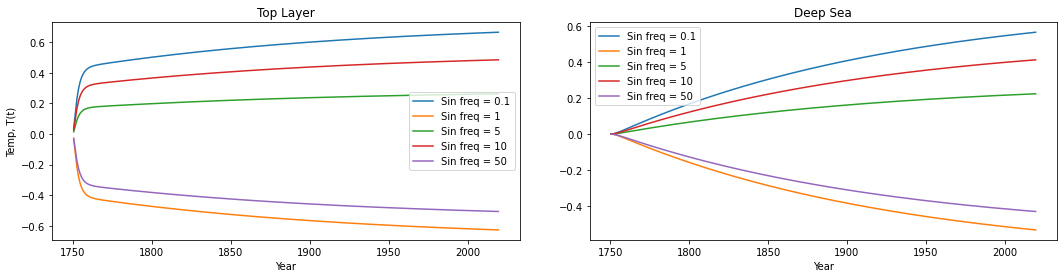

In [178]:
# Plotting the sinusoidal forcing scenarios

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = step_names_sinx

run_outputs = [runs.get(key) for key in scenario_names]

layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()

Hmmmmm. Why do we get such sudden flips? Does this again have to do with the final value?


In [184]:
scenario_names = step_names_sinx
freqs = [0.1, 1, 5, 10, 50]
run_outputs = [runs.get(key) for key in scenario_names]

for (freq, scen) in zip (freqs, scenario_names):

    print(scen, "- End value: ", np.sin(xs * freq)[-1])



Sin freq = 0.1 - End value:  0.9807632477451521
Sin freq = 1 - End value:  -0.9234468802429867
Sin freq = 5 - End value:  0.38789277497415287
Sin freq = 10 - End value:  0.715045036547683
Sin freq = 50 - End value:  -0.7458766392979976


Yes. This seems to yet again be the issue ! Why? We must figure this out.

 # Results

The code is heavily dependent on the final forcing value. Why? We must find out. This is making it difficult to see any real results.

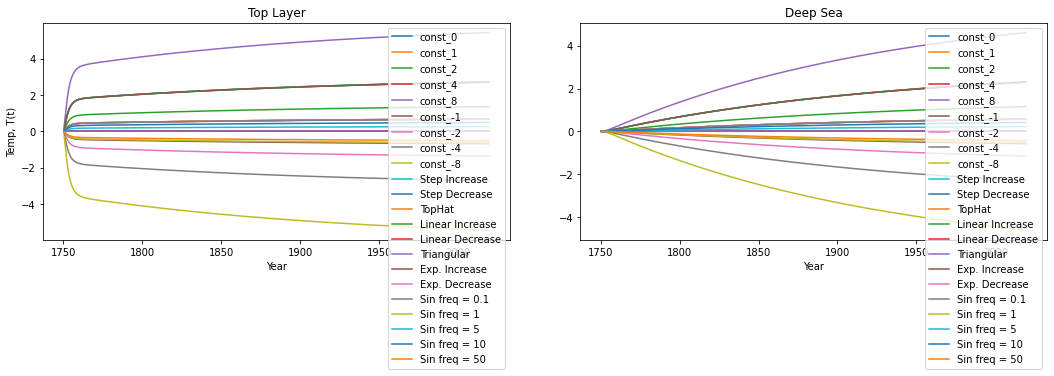

In [185]:
# Plotting all

fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=0.15); fig.set_figwidth(18)
axs[0].set_ylabel('Temp, T(t)');


scenario_names = list(runs.keys())
run_outputs = list(runs.values())
layers = ["Top Layer", "Deep Sea"]

for (run, scen) in zip (run_outputs, scenario_names):
    for (subpl, col, layer) in zip(axs, [0,1], layers):
        if col == 0:
            subpl.plot(run.time, run.tg, label = scen)
        else:
             subpl.plot(run.time, run.tlev[:,1], label = scen)
        subpl.title.set_text(layer)
        subpl.set_xlabel('Year')
    
for subpl in axs:
    
    subpl.legend()